In [14]:
import pandas as pd
import numpy as np

In [16]:
data = open("2023/data2023.txt").read().split("\n\n")
data = [[y for y in x.split("\n") if y != "" and "Logo" not in y] for x in data if x != ""]
bad = [[len(x),x] for x in data if len(x) != 22]
good2023 = [x for x in data if len(x) == 22]
len(good2023)

4266

In [17]:
data = open("2024/data2024.txt").read().split("\n\n")
data = [[y for y in x.split("\n") if y != "" and "Logo" not in y] for x in data if x != ""]
bad = [[len(x),x] for x in data if len(x) != 22]
good2024 = [x for x in data if len(x) == 22]
len(good2024)

987

In [18]:
labels = ["organization name","num employees", "founded date","description","industries","headquarters location","description","cb rank","postal code","headquarters region","website","actively hiring","linkedin","num articles","email","hub tag","phone num","num of sub org","industry groups","total funding amt","company type","estimated rev"]
dataset = good2023 + good2024
df = pd.DataFrame(dataset,columns=labels)

In [129]:
df.industries

0       Artificial Intelligence (AI), Generative AI, G...
1       Artificial Intelligence (AI), Generative AI, S...
2       Artificial Intelligence (AI), Generative AI, I...
3                                                Software
4                  Artificial Intelligence (AI), Software
5       Artificial Intelligence (AI), E-Learning, EdTe...
6                       Cloud Computing, Machine Learning
7       Artificial Intelligence (AI), Data Center Auto...
8                            Artificial Intelligence (AI)
9       Artificial Intelligence (AI), Content, Digital...
10      Apps, Artificial Intelligence (AI), Generative...
11      Artificial Intelligence (AI), Natural Language...
12      Artificial Intelligence (AI), Data Integration...
13        Artificial Intelligence (AI), Legal, Legal Tech
14      Apps, Artificial Intelligence (AI), Generative...
15      Artificial Intelligence (AI), Information Serv...
16      Artificial Intelligence (AI), Audio, Developer...
17      Artifi

In [21]:
df.iloc[0]

organization name                                                     Pika
num employees                                                         1-10
founded date                                                          2023
description              Pika is a startup that is developing an AI-pow...
industries               Artificial Intelligence (AI), Generative AI, G...
headquarters location                 Palo Alto, California, United States
description              Pika is a startup that develops an AI-powered ...
cb rank                                                                 78
postal code                                                              —
headquarters region      San Francisco Bay Area, Silicon Valley, West C...
website                                                           pika.art
actively hiring                                                          —
linkedin                                                  View on LinkedIn
num articles             

/var/folders/nf/2dvvlnxj5v962kwwzmpfj17h0000gn/T/ipykernel_39624/1488674746.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjusts subplots to give some padding


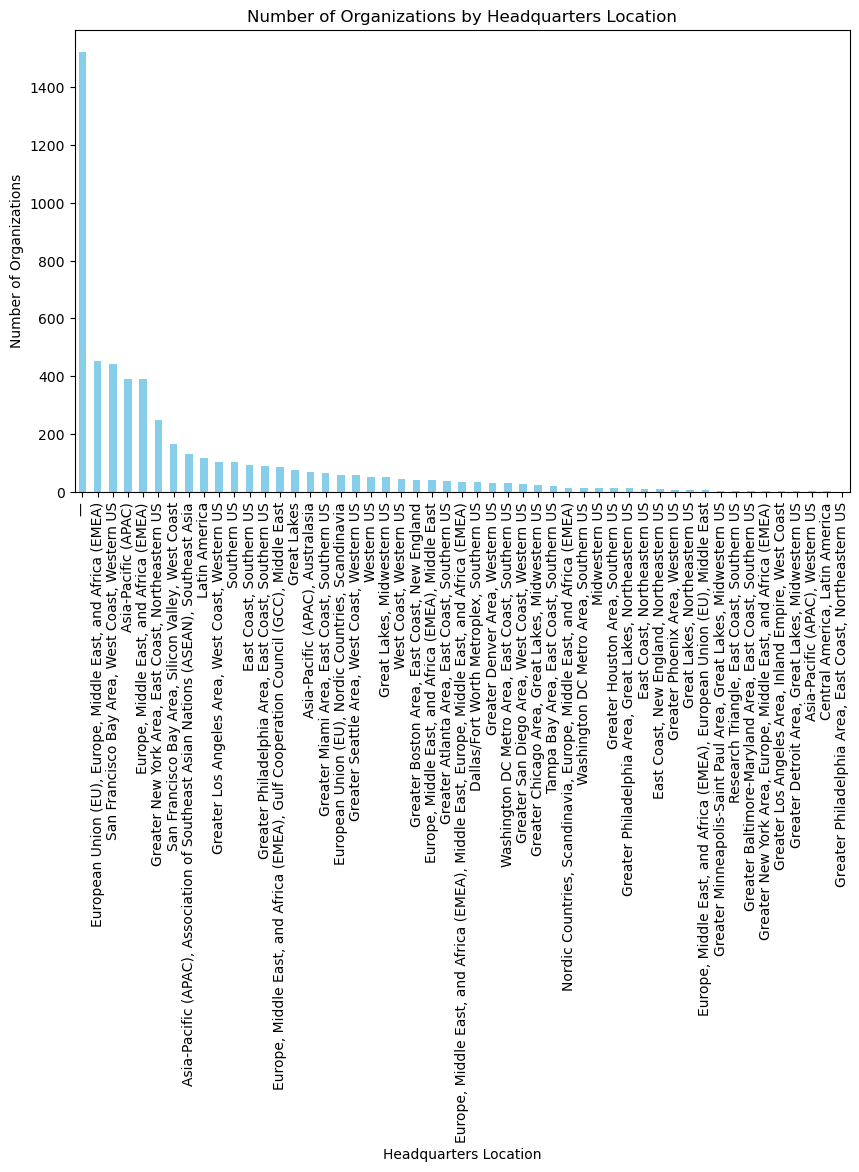

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already loaded with data

# Group by 'headquarters location', count 'organization name', and sort in descending order
grouped_data = df.groupby("headquarters region")["organization name"].count().sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')  # You can change the color and kind of plot as needed
plt.title('Number of Organizations by Headquarters Location')
plt.xlabel('Headquarters Location')
plt.ylabel('Number of Organizations')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjusts subplots to give some padding
plt.show()


In [23]:
df.columns

Index(['organization name', 'num employees', 'founded date', 'description',
       'industries', 'headquarters location', 'description', 'cb rank',
       'postal code', 'headquarters region', 'website', 'actively hiring',
       'linkedin', 'num articles', 'email', 'hub tag', 'phone num',
       'num of sub org', 'industry groups', 'total funding amt',
       'company type', 'estimated rev'],
      dtype='object')

In [25]:
pd.DataFrame(df.industries.value_counts().reset_index())

industries  count
0                                                     —    679
1                                              Software    177
2                          Artificial Intelligence (AI)    130
3                Artificial Intelligence (AI), Software     86
4                      Information Technology, Software     51
...                                                 ...    ...
3102  Artificial Intelligence (AI), GovTech, Softwar...      1
3103  Artificial Intelligence (AI), Blogging Platfor...      1
3104  Artificial Intelligence (AI), Machine Learning...      1
3105                                         Blockchain      1
3106  Artificial Intelligence (AI), Internet, Legal ...      1

[3107 rows x 2 columns]

In [26]:
df['description_all'] = df['description'].iloc[:,0] + " " + df['description'].iloc[:,1]


In [27]:
df['industries_parsed'] = df['industries'].apply(lambda x: [i.strip() for i in x.split(',') if i.strip() != 'Artificial Intelligence (AI)' and i.strip() !='—'])


In [28]:
all_industries = sum(df['industries_parsed'].tolist(), [])
all_industries = [x for x in all_industries if x != '-']
df.industries_parsed
all_industries[-10:-1]

['Geospatial',
 'Mapping Services',
 'Information Technology',
 'Software',
 'Virtual Assistant',
 'Web Apps',
 'Law Enforcement',
 'Internet',
 'Legal Tech']

In [29]:
industries_df = pd.DataFrame({"all_industries":all_industries})

# Group by the industry names and count occurrences
industry_counts = industries_df.groupby("all_industries").size().reset_index(name='Count')

# # Plotting
# plt.figure(figsize=(10, 8))
# plt.bar(industry_counts['all_industries'], industry_counts['Count'], color='skyblue')
# plt.xlabel('Industries')
# plt.ylabel('Count')
# plt.title('Frequency of Industries')
# plt.xticks(rotation=90)
# plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
# plt.show()

industry_counts = industries_df.groupby("all_industries").size().reset_index(name='Count')

# If you want to display all rows in the Jupyter notebook or other Python environments:
pd.set_option('display.max_rows', None)  # This sets the pandas option to display all rows

# Display all entries
print(industry_counts)


                                      all_industries  Count
0                                        3D Printing      2
1                                      3D Technology     13
2                                        A/B Testing      2
3                                         Accounting     22
4                                         Ad Network      2
5                                          Ad Server      1
6                                       Ad Targeting      2
7                                              Adult      2
8                                 Advanced Materials      3
9                                        Advertising     90
10                             Advertising Platforms     18
11                                            Advice      4
12                                          Advocacy      2
13                                         Aerospace     19
14                               Affiliate Marketing      4
15                                      

In [30]:
descriptions = list(df.description_all)
descriptions


['Pika is a startup that is developing an AI-powered platform for editing and generating films from captions and still images. The company aims to revolutionize the video creation and editing process through the integration of AI, offering a user-friendly and easily accessible tool for users. Pika is a startup that develops an AI-powered platform for editing and generating films from captions and still images.',
 'Contextual AI offers a pioneering approach to generative AI for the workplace. Contextual AI offers a pioneering approach to generative AI for the workplace.',
 'Liquid AI is a developer of AI applications that help improve human experience. It focuses on researching and developing tools that use artificial intelligence to improve creative workflows and help clients manage their workflow efficiently. Liquid AI is a developer of AI applications that help improve human experience.',
 'Ava is an AI dating app. Ava is an AI dating app.',
 'LlamaIndex is a simple, flexible data fr

In [73]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from collections import Counter

# # Download necessary NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')


# def preprocess_descriptions(descriptions):
#     # Lowercase and remove punctuation
#     descriptions = [desc.lower() for desc in descriptions]
#     tokenizer = nltk.RegexpTokenizer(r"\w+")
#     descriptions = [" ".join(tokenizer.tokenize(desc)) for desc in descriptions]
    
#     # Tokenize words
#     tokenized_descriptions = [word_tokenize(desc) for desc in descriptions]
    
#     # Remove stopwords
#     stop_words = set(stopwords.words('english'))
#     filtered_descriptions = [[word for word in desc if word not in stop_words] for desc in tokenized_descriptions]
    
#     return filtered_descriptions

# def find_common_trends(filtered_descriptions):
#     # Flatten list and count word frequencies
#     all_words = [word for sublist in filtered_descriptions for word in sublist]
#     word_counts = Counter(all_words)
    
#     # Most common words
#     common_words = word_counts.most_common(100)
    
#     return common_words

# # Process the descriptions
# filtered_descriptions = preprocess_descriptions(descriptions)

# # Find common trends
# common_trends = find_common_trends(filtered_descriptions)

# print("Most common words and trends:", common_trends)


In [159]:
descriptions[:10]

['Pika is a startup that is developing an AI-powered platform for editing and generating films from captions and still images. The company aims to revolutionize the video creation and editing process through the integration of AI, offering a user-friendly and easily accessible tool for users. Pika is a startup that develops an AI-powered platform for editing and generating films from captions and still images.',
 'Contextual AI offers a pioneering approach to generative AI for the workplace. Contextual AI offers a pioneering approach to generative AI for the workplace.',
 'Liquid AI is a developer of AI applications that help improve human experience. It focuses on researching and developing tools that use artificial intelligence to improve creative workflows and help clients manage their workflow efficiently. Liquid AI is a developer of AI applications that help improve human experience.',
 'Ava is an AI dating app. Ava is an AI dating app.',
 'LlamaIndex is a simple, flexible data fr

In [6]:
from dotenv import load_dotenv
import os
from os import getenv
from openai import OpenAI
# Load the .env file
load_dotenv("../.env",override=True)

key = os.getenv("OPENAI_API_KEY")


class chatGPT():
    def __init__(self):
        # Get API key from environment variable
        my_key = getenv("OPENAI_API_KEY")
        print(my_key)
        if my_key is None:
            raise ValueError("API key not found in .env file")
        
        # Initialize OpenAI client with API key
        self.client = OpenAI(api_key=my_key)
        
    def ask(self, q):
        stream = self.client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": q}],
            stream=True,
            temperature=1
        )
        response = ""
        for chunk in stream:
            if chunk.choices[0].delta.content is not None:
                response += chunk.choices[0].delta.content

        self.response = response
        return response


x = chatGPT()
x.ask("Hey")

sk-proj-NAyMH2u9z5b5nTaqrOfNT3BlbkFJywgPok9bPiUJ055xGHCk


'Hello! How can I assist you today?'

In [54]:
prompt = """
Your role is to decompose a description of a company into keywords about what they do. Make simple please!

EXAMPLES BELOW 
_________________________
Description:
Pika is a startup that is developing an AI-powered platform for editing and generating films from captions and still images. The company aims to revolutionize the video creation and editing process through the integration of AI, offering a user-friendly and easily accessible tool for users. Pika is a startup that develops an AI-powered platform for editing and generating films from captions and still images.
Shortened:
video & image generation

Descriotion:Liquid AI is a developer of AI applications that help improve human experience. It focuses on researching and developing tools that use artificial intelligence to improve creative workflows and help clients manage their workflow efficiently. Liquid AI is a developer of AI applications that help improve human experience
Shortened:
general purpsoe workflows

Description: Portkey enables businesses to design, deploy, maintain, and improve their generative AI apps and features more quickly, through a quick integration, businesses may add observability, model management, experimentation, and compliance to their products. Portkey enables businesses to design, deploy, maintain, and improve on their generative AI apps and features more quickly.
Shortened:
generative AI apps for businesses
_________________________
Now, your turn:
Description: $description
Shortened:
"""


In [63]:

import pandas as pd


results = []

# Loop through descriptions, replace the placeholder, call x.ask, and store results
for i in range(100):
    p1 = prompt.replace("$description", des[i])
    result = x.ask(p1)
    print(des[i])
    print(result)
    # Append the description and result to the DataFrame
    results.append({'Description': des[i], 'Result': result})


results_df = pd.DataFrame(results)

# Optionally, save the DataFrame to a CSV file
results_df.to_csv('results.csv', index=False)


Pika is a startup that is developing an AI-powered platform for editing and generating films from captions and still images. The company aims to revolutionize the video creation and editing process through the integration of AI, offering a user-friendly and easily accessible tool for users. Pika is a startup that develops an AI-powered platform for editing and generating films from captions and still images.
AI-powered video creation & editing
Contextual AI offers a pioneering approach to generative AI for the workplace. Contextual AI offers a pioneering approach to generative AI for the workplace.
generative AI for the workplace
Liquid AI is a developer of AI applications that help improve human experience. It focuses on researching and developing tools that use artificial intelligence to improve creative workflows and help clients manage their workflow efficiently. Liquid AI is a developer of AI applications that help improve human experience.
AI tools for workflow management
Ava is 

In [77]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


my_key = getenv("OPENAI_API_KEY")
client = OpenAI(api_key=my_key)


def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

results_df['embedding'] = results_df.Result.apply(lambda x: get_embedding(x, model='text-embedding-3-small'))
results_df.to_csv('embedded_results.csv', index=False)

In [80]:
embeddings = list(results_df.embedding)

                                               Result  Cluster
0                    powered video creation & editing        0
1                       generative  for the workplace        3
2                       tools for workflow management        9
3                                          dating app       11
4            data framework for large language models       11
5                                  tools for teachers       10
6                 infrastructure for machine learning        5
7                        automated research workflows        9
8   safe and reliable  technology for human life i...        5
9                         creative content generation       13
10                    generative  apps for businesses        3
11   large language models & semantic search platform       11
12         system for data management and evaluations        1
13                   legal tech & regulatory insights        8
14                       custom generative  workflows  

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


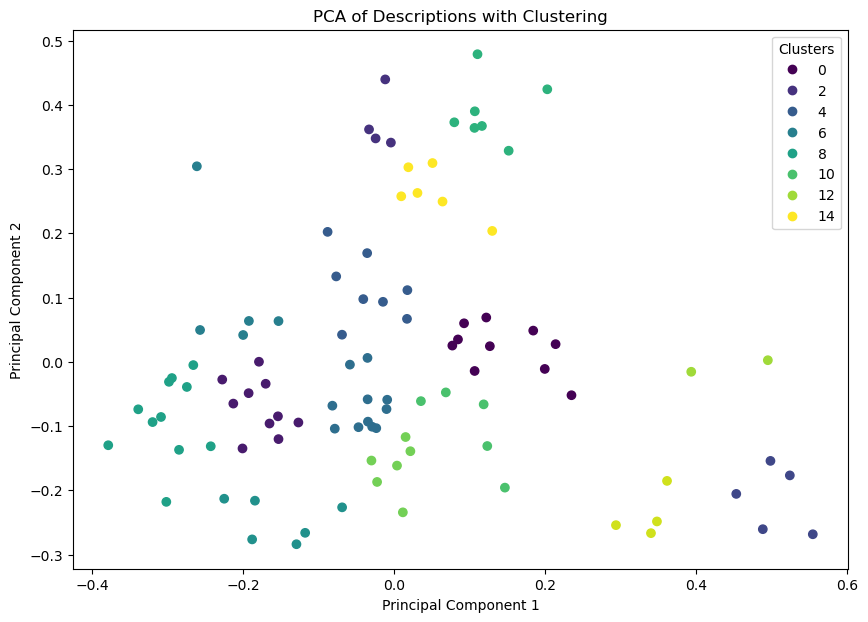

In [89]:
# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=15)  # Choose an appropriate number of clusters
clusters = kmeans.fit_predict(pca_result)

# Create a DataFrame with the PCA results and clusters
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Result'] = results_df['Result']
pca_df['Cluster'] = clusters

# Display which description is in which cluster
clustered_descriptions = pca_df[['Result', 'Cluster']]
print(clustered_descriptions)

# Plot the PCA results with clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('PCA of Descriptions with Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()



In [90]:
pca_df[pca_df["Cluster"]==4]

PC1       PC2                                     Result  Cluster
35 -0.087955  0.202233            communication & task management        4
37  0.017672  0.111522         assisted code development services        4
48 -0.068882  0.042153             chatbot for financial research        4
63  0.017151  0.066828                API &  development platform        4
68 -0.040724  0.097550                  help center for SaaS apps        4
73 -0.076568  0.132901     automated data mapping & normalization        4
75 -0.035572  0.169144  industrial operations management platform        4
77 -0.014637  0.093356   tools for small & mediumsized businesses        4

In [106]:
embeddings = list(results_df.embedding)
embeddings

[[-0.01593729294836521,
  0.008199908770620823,
  -0.02717004530131817,
  -0.03845565766096115,
  -0.013571808114647865,
  -0.06168763339519501,
  0.04604106768965721,
  0.04923909902572632,
  -0.006637235172092915,
  0.01834242418408394,
  0.04596177861094475,
  0.009825354442000389,
  -0.05994325131177902,
  -0.03665841743350029,
  0.04083435982465744,
  0.006138368509709835,
  -0.021117573603987694,
  -0.005153851117938757,
  0.006918054074048996,
  0.01031430996954441,
  -0.004489797167479992,
  -0.002601703628897667,
  0.01669054850935936,
  0.041362959891557693,
  0.006270518526434898,
  -0.010737190023064613,
  -0.009871606715023518,
  0.023231973871588707,
  0.006019433494657278,
  -0.031504567712545395,
  0.03287892788648605,
  -0.037160586565732956,
  0.020575759932398796,
  -0.0319274477660656,
  -0.013981472700834274,
  -0.007644879166036844,
  0.010836302302777767,
  -0.005193496122956276,
  -0.019227828830480576,
  -0.011635810136795044,
  0.016201592981815338,
  -0.00634

In [115]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import numpy as np

# Assuming `results` and `embeddings` are already defined and contain your data

x = results[5]
ex = embeddings[5]

# Normalize the embedding
embedding_1 = normalize(np.array(ex).reshape(1, -1))

# Loop through embeddings to compute cosine similarity
for i in range(len(embeddings)):
    ey = embeddings[i]
    embedding_2 = normalize(np.array(ey).reshape(1, -1))

    # Compute cosine similarity
    similarity = cosine_similarity(embedding_1, embedding_2)

    # Print the similarity
    print(f"Cosine similarity between the embeddings of '{x}' and '{results[i]}': {similarity[0][0]}")


Cosine similarity between the embeddings of ' tools for teachers' and 'powered video creation & editing': 0.3391455479418708
Cosine similarity between the embeddings of ' tools for teachers' and 'generative  for the workplace': 0.3243436836409171
Cosine similarity between the embeddings of ' tools for teachers' and ' tools for workflow management': 0.5422227790013274
Cosine similarity between the embeddings of ' tools for teachers' and ' dating app': 0.2468481385753057
Cosine similarity between the embeddings of ' tools for teachers' and 'data framework for large language models': 0.2433660450596365
Cosine similarity between the embeddings of ' tools for teachers' and ' tools for teachers': 0.9999999999999996
Cosine similarity between the embeddings of ' tools for teachers' and 'infrastructure for machine learning': 0.2918083222104739
Cosine similarity between the embeddings of ' tools for teachers' and 'automated research workflows': 0.3392796013366562
Cosine similarity between the em

Cosine Similarity Matrix:
[[1.         0.27547925 0.35287727 ... 0.21001219 0.25364578 0.26418177]
 [0.27547925 1.         0.36629784 ... 0.20331531 0.24337786 0.38569298]
 [0.35287727 0.36629784 1.         ... 0.24580971 0.30929239 0.47000292]
 ...
 [0.21001219 0.20331531 0.24580971 ... 1.         0.20338127 0.25542398]
 [0.25364578 0.24337786 0.30929239 ... 0.20338127 1.         0.43366024]
 [0.26418177 0.38569298 0.47000292 ... 0.25542398 0.43366024 1.        ]]


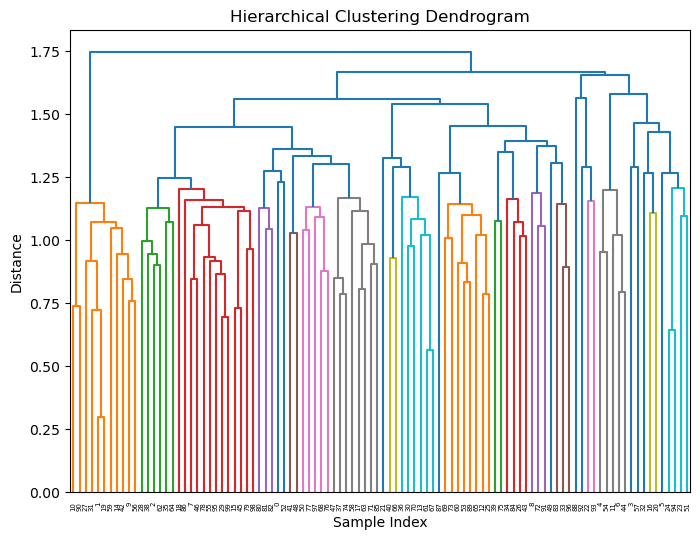

Cluster Labels: [ 5  1  2 24 23 30 23  3 17  1  1 23 13 11  1  3 26  9  3  1 26 12 20 29
 28 13 16  1  2  3 11  1 27 18 16  2 11  9  2 15 10  7  1 16 23  3  3  9
  7 19  8 29  6 13 23  3  1 25  9  1 13 11  2  9  2 13 10 11  8 13 11  9
 17 13  9 15  8  8  3  3  4  4  4 18 16  9  3 14 22 13  1 17 21 20 28  3
 18  8  3  3]


In [124]:
similarity_matrix = cosine_similarity(embeddings)

# Display the similarity matrix
print("Cosine Similarity Matrix:")
print(similarity_matrix)

# Convert cosine similarity to cosine distance
distance_matrix = 1 - similarity_matrix

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Perform hierarchical clustering using the distance matrix
linkage_matrix = linkage(distance_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, labels=np.arange(len(embeddings)))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Extract cluster labels (e.g., for 2 clusters)
cluster_labels = fcluster(linkage_matrix, t=30, criterion='maxclust')
print("Cluster Labels:", cluster_labels)


In [128]:
results_df["clusters"]=cluster_labels
results_df[results_df["clusters"]==3]

Description  \
7   Elicit is an artificial intelligence research ...   
15  Induced AI works to automate browser tasks. It...   
18  Greenlite is a financial crime automation plat...   
29  AiSDR automates meeting scheduling by categori...   
45  Automat offers robotic process automation for ...   
46  Delphina helps data science teams drive busine...   
55  Reworkd is an AI-driven automation platform th...   
78  Remuner is the variable compensation platform ...   
79  — Pathways automates the creation of Life Cycl...   
86  Nokod delivers an application security platfor...   
95  DeckMatch simplifies routine tasks through aut...   
98  Construction is one of the largest industries ...   
99  Holly is an AI recruiter that automates the re...   

                                               Result  \
7                        automated research workflows   
15                            browser task automation   
18  financial crime automation,  compliance operat...   
29     automated meeting scheduling & email campaigns   
45              robotic process automation for Chrome   
46                            data science automation   
55                        business process automation   
78                        sales commission automation   
79  environmental assessment automation for manufa...   
86  application security for lowcode/nocode apps a...   
95                    automation for VC professionals   
98              automated construction cost estimates   
99                             recruitment automation   

                                            embedding  clusters  
7   [0.009285252541303635, 0.008986822329461575, 0...         3  
15  [-0.06406091153621674, -0.005488290451467037, ...         3  
18  [-0.02696339227259159, 0.009889492765069008, 0...         3  
29  [-0.045697472989559174, -0.014283769764006138,...         3  
45  [-0.0062140412628650665, 0.006052879150956869,...         3  
46  [-0.008141471073031425, 0.004394471179693937, ...         3  
55  [-0.052063968032598495, 0.019278403371572495, ...         3  
78  [-0.02275094948709011, 0.014955641701817513, 0...         3  
79  [-0.031422268599271774, 0.013187550008296967, ...         3  
86  [-0.034571323543787, 0.04364856332540512, 0.06...         3  
95  [-0.028646353632211685, -0.022561755031347275,...         3  
98  [-0.0009160898625850677, -0.008133255876600742...         3  
99  [-0.026848560199141502, 0.029510898515582085, ...         3

In [169]:
df.website

0                                                pika.art
1                                           contextual.ai
2                                               liquid.ai
3                                             withava.ai/
4                                      www.llamaindex.ai/
5                                      www.magicschool.ai
6                                        voltagepark.com/
7                                              elicit.com
8                                        guardrailsai.com
9                                           www.genmo.ai/
10                                          portkey-ai.us
11                                               dust.tt/
12                                 www.braintrustdata.com
13                                              paxton.ai
14                                     www.vectorshift.ai
15                                         www.induced.ai
16                                           retellai.com
17            

In [146]:
df.description

description  \
0     Pika is a startup that is developing an AI-pow...   
1     Contextual AI offers a pioneering approach to ...   
2     Liquid AI is a developer of AI applications th...   
3                              Ava is an AI dating app.   
4     LlamaIndex is a simple, flexible data framewor...   
5     MagicSchool provides various AI tools to assis...   
6     Voltage Park provides infrastructure for machi...   
7     Elicit is an artificial intelligence research ...   
8     Guardrails AI aim to unlock an unparalleled sc...   
9     Genmo is an artificial intelligence creative c...   
10    Portkey enables businesses to design, deploy, ...   
11    Dust is a platform for creating sophisticated ...   
12    Braintrust offers an AI stack to simplify the ...   
13    Paxton AI is a legal tech company that utilize...   
14                                                    —   
15    Induced AI works to automate browser tasks. It...   
16    RetellAI is an API for creating human-like con...   
17    LastMile AI provides an AI developer platform ...   
18    Greenlite is a financial crime automation plat...   
19    Rhythms offers generative AI, the prevalence o...   
20    Echo Labs is developing the first artificial i...   
21    Segwise builds AI Agents that help game studio...   
22    TRIVER provides small businesses with instant ...   
23    Meeno offers an AI relationship mentoring app ...   
24    Class Companion is a new AI technology that al...   
25    At Arcus, our mission is to advance AI through...   
26    Distributional makes AI safe, reliable and sec...   
27    Nexusflow is a generative AI business that wor...   
28                                                    —   
29    AiSDR automates meeting scheduling by categori...   
30    Dili (YC S23) is an AI copilot that can superc...   
31    GenHealth.ai provides healthcare solutions usi...   
32    Prophetic AI is a non-invasive neurotech compa...   
33    RadiantGraph is on a mission to make healthcar...   
34    Qevlar focuses on increasing the productivity ...   
35    Mindy provides tangible value to your current ...   
36    FirmPilot develops an AI-driven marketing engi...   
37                                                    —   
38    Lutra AI is to simplify complex tasks that spe...   
39                                                    —   
40    Xylem is a fully managed platform for teams to...   
41    Metal does machine learning embeddings as a se...   
42                                                    —   
43    HydroX AI is an AI-based security platform tha...   
44    Giga ML is a platform to train and deploy on p...   
45    Automat offers robotic process automation for ...   
46    Delphina helps data science teams drive busine...   
47    SapientAI created AI Test Coder, the first pla...   
48    Finpilot's chatbot tool seeks to increase the ...   
49    Spiffy is working on Outcome-Oriented Models (...   
50    Basis operates as an AI platform built specifi...   
51    Univerbal empowers language learners to practi...   
52    Osium AI revolutionize materials development c...   
53                                                    —   
54    Defog integrates into your app and allows your...   
55    Reworkd is an AI-driven automation platform th...   
56    InvokeAI is the Generative AI tool for profess...   
57    Handraise is unlocking the power of news with ...   
58                                                    —   
59                                                    —   
60    Fifth Dimension AI is to analyze high-value da...   
61    Responsiv is an AI assistant for in house lega...   
62    Gushwork operates as an AI-powered global plat...   
63                                                    —   
64    Sweep is an artificial intelligence assistant ...   
65                                                    —   
66    Phospho is Amplitude for LLM applications. All...   
67    Bench IQ is an AI-powered 

In [147]:
df.head(100)

organization name num employees founded date  \
0                          Pika          1-10         2023   
1                 Contextual AI          1-10         2023   
2                     Liquid AI          1-10         2023   
3                           Ava          1-10         2023   
4                    LlamaIndex          1-10         2023   
5                MagicSchool AI          1-10         2023   
6                  Voltage Park          1-10         2023   
7                        Elicit          1-10         2023   
8                 Guardrails AI          1-10         2023   
9                         Genmo          1-10         2023   
10                   Portkey AI          1-10         2023   
11                         Dust          1-10         2023   
12              Braintrust Data          1-10         2023   
13                    Paxton AI          1-10         2023   
14                  VectorShift          1-10         2023   
15                   Induced AI          1-10         2023   
16                    Retell AI          1-10         2023   
17                  LastMile AI          1-10         2023   
18                    Greenlite          1-10         2023   
19                      Rhythms          1-10         2023   
20                    Echo Labs          1-10         2023   
21                      Segwise          1-10         2023   
22                       TRIVER          1-10         2023   
23                        Meeno          1-10         2023   
24              Class Companion          1-10         2023   
25                        Arcus          1-10     Jan 2023   
26               Distributional          1-10         2023   
27                    Nexusflow          1-10         2023   
28                      Leap AI          1-10         2023   
29                        AiSDR          1-10         2023   
30                         dili          1-10         2023   
31                 GenHealth.ai          1-10         2023   
32                 Prophetic AI          1-10         2023   
33                 RadiantGraph          1-10         2023   
34                    Qevlar AI          1-10         2023   
35                        Mindy          1-10         2023   
36                    FirmPilot          1-10         2023   
37                      Codegen          1-10         2023   
38                     Lutra AI          1-10         2023   
39                      Gradial          1-10         2023   
40                     Xylem AI          1-10         2023   
41                        Metal          1-10         2023   
42                      HeyMilo          1-10         2023   
43                    HydroX AI          1-10         2023   
44                      Giga ML          1-10         2023   
45                   Automat AI          1-10         2023   
46                     Delphina          1-10         2023   
47                    SapientAI          1-10         2023   
48                     Finpilot          1-10         2023   
49                    Spiffy AI          1-10         2023   
50                        Basis          1-10         2023   
51  Univerbal (formerly Quazel)          1-10         2023   
52                     Osium AI          1-10         2023   
53                    Teragonia          1-10         2023   
54                        Defog          1-10         2023   
55                      Reworkd          1-10         2023   
56                    Invoke AI          1-10         2023   
57                    Handraise          1-10         2023   
58                       Zep AI          1-10         2023   
59                     Helicone          1-10         2023   
60           Fifth Dimension AI          1-10     Jan 2023   
61                    Responsiv          1-10         2023   
62                     Gushwork          1-10         2023   
63                        Dapta          1-10 

In [31]:
# from transformers import BertModel, BertTokenizer


# # Load pre-trained model tokenizer (vocabulary)
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Encode text
# for text in df.description_all[:10]:
#     print(x)
#     encoded_input = tokenizer(text, return_tensors='pt')
    
#     # Load pre-trained model
#     model = BertModel.from_pretrained('bert-base-uncased')
    
#     # Forward pass, get hidden states
#     with torch.no_grad():
#         outputs = model(**encoded_input)
    
#     # Get embeddings for the first token in the tensor (usually the [CLS] token)
#     embeddings = outputs.last_hidden_state[:, 0, :]
    
#     print(embeddings)

In [36]:
des = list(df.description_all)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_embeddings = scaler.fit_transform(embeddings)